<a href="https://colab.research.google.com/github/JMQuinlan/Thermo/blob/main/Thermo_Calc_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAE 3302 - Thermo 2
# Thermodynamic calculations the easy way!

copyright 2021 - J. M. Quinlan  
University of Colorado  
Colorado Springs

This notebook will show you how to evaluate thermodynamic properties using CoolProp, a python wrapper based on NIST tables in the form of RefProp.

I have also included a short python introduction below, which should be about everything you need to get started.


# CoolProp
Let's start by installing any libraries that we will need.
Here only "CoolProp":

In [6]:
! pip install CoolProp

The above code should let you know that the library was installed (or previously installed in subsequent executions).
The ! tells the CoLab that the command is for the command line, not python.

Now, we import the library:

In [7]:
import CoolProp.CoolProp as CP

We only import the part of the library that we will use, and, we are giving it an alias so that when we access it we don't have to type so much.

Now we can call the library's functions, for example to evaluate the saturation temperature of water at 1 atm (seems like we should already know that though):

In [8]:
T_sat = CP.PropsSI('T','P',101325.,'Q',0.,'Water')
# Simple print statement:
print(T_sat)
# More useful print statement
print('The saturation temperature at 1 atm is: '+str(round(T_sat ,4))+' K')

373.1242958476844
The saturation temperature at 1 atm is: 373.1243 K


We can see a few things from this simple example.

First the units are fundamental SI units: Pa, K, J, N, m, ...

Next we see the function call is:

(1) a string telling function what you would like returned, here, 'T', which stands for temperature.  
(2) the first intensive property that you know, via a string, here, 'P', which stands for Pressure.  
(3) the SI united value of the first intensive property.  
(4) the second intensive property that you know, via a string, here, 'Q', which stands for Quality.  Note that we would get the same value of T_sat for any valid quality, namely Q in [0,1].  
(5) the SI united value of the second intensive property.  
(6) the substance of which you want to find the property.  Note here that this can be a pure substance, like 'Water', or a pseudo-pure substance (acts approximately like a pure substance), like 'Air'.

This makes sense, if we know two independent intensive properties, we can find all others.

You could find the enthalpy of saturated water vapor at 1 atm with:

In [9]:
H_sat_vapor = CP.PropsSI('H','P',101325.,'Q',1.,'Water')
print('The enthalpy of saturated water vapor at 1 atm is: '+str(round(H_sat_vapor ,4))+' J/kg')

The enthalpy of saturated water vapor at 1 atm is: 2675529.3255 J/kg


This value should be 1000 times what is listed in your book (book's tables are in kJ/kg).

To find the entropy of air at 3 atm and 1500 K you would input:

In [10]:
S_air = CP.PropsSI('S','P',3.*101325.,'T',1500.,'Air')
print('The entropy of air at 3 atm and 1500 K is: '+str(round(S_air ,4))+' J/(kg K)')

The entropy of air at 3 atm and 1500 K is: 5315.3342 J/(kg K)


This value will not be directly comparable to values in the book’s tables due to differences in the reference state, but as long as you are finding ∆s, which we will be, then you should find comparable results—try it.

***

Let's work on calculating what we might need for a process.

If you wanted to find the change in mass specific enthalpy for water vapor through an isentropic process from 500 K and 1 atm to 1000 K, the code might look like this:

In [25]:
T1 = 500.
p1 = 101325.
T2 = 1000.

h1 = CP.PropsSI('H','P',p1,'T',T1,'Water')
s1 = CP.PropsSI('S','P',p1,'T',T1,'Water')

s2 = s1

h2 = CP.PropsSI('H','S',s2,'T',T2,'Water')
Delta_h = h2 - h1

# If you wanted to know p_2
p2 = CP.PropsSI('P','S',s2,'T',T2,'Water')

# Print \Delta enthalpy

print('The change in enthalpy is: '+str(round(Delta_h ,4))+' J/kg')
print('And the pressure at state 2 is: '+str(round(p2 ,4))+' Pa'+' or '+str(round(p2/101325. ,4))+' atm')

The change in enthalpy is: 1049800.8625 J/kg
And the pressure at state 2 is: 2346116.0688 Pa or 23.1544 atm


# Python tips

Now let's see how to use python.

Again, we'll likely need to import some libraries.

We might want some useful functions to do some math (from "math").

Or use more involved numerical libraries, like NumPy.

In [14]:
from math import exp,pi
import numpy as np

# For example, to find sin(pi) (which equals zero) you would input:
needed_value = np.sin(pi)
print(needed_value)
# Note that the value isn't exactly zero

1.2246467991473532e-16


High-quality plots (vector graphics) are generated using the matpolotlib module. Once the figure has been generated and looks how you want it, then export the plot as a vector graphics file (Matlab could only dream to output such nice figures with a bunch of work, though, it can be done, see export_fig by Yair Altman):

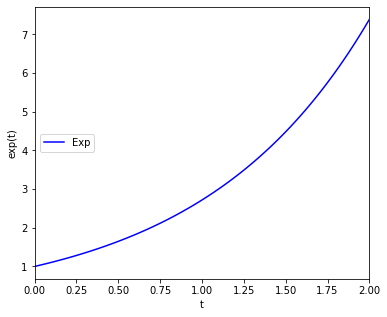

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [23]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

fig = plt.figure(32,figsize=(6,5))
tvec = np.linspace(0,2,num=100)
plt.plot(tvec,np.exp(tvec),'-b',label='Exp')
plt.legend(loc=6)
plt.xlabel('t')
plt.xlim([0, 2])
plt.ylabel('exp(t)')

plt.show()

fig.savefig('Fig_test.eps')
# or output pdf file (just don't waste your time outputting jpg or png files)
fig.savefig('Fig_test.pdf')

plt.close()

You can click on the folder on the left-hand side of the window to see the saved files.

We have saved the file as an Encapsulated PostScript file, great for LaTeX, but not very well supported on Windows, so it may be better to use the pdf file.

Get started!